<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/log/exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: xlabel='exam 1', ylabel='exam 2'>

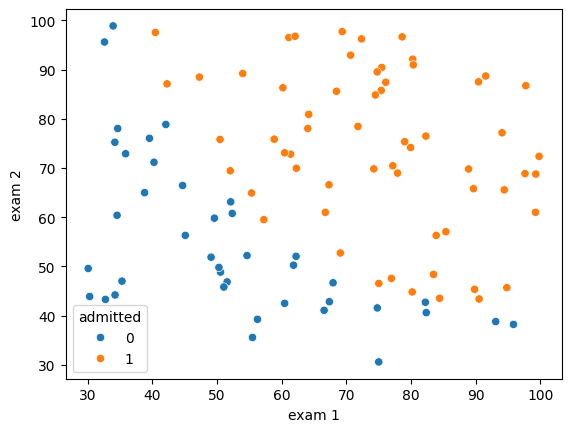

In [6]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn





 # load the data from the file
data = pd.read_csv("marks.txt",header = None)
data.columns = ['exam 1', 'exam 2', 'admitted']

 # X = feature values, all the columns except the last column
X = data[['exam 1','exam 2']]
y=data['admitted']

sbn.scatterplot(x = 'exam 1', y = 'exam 2', hue = 'admitted', data =data)

In [20]:
X =data[['exam 1', 'exam 2']]
X=X/100
N = len(X)
print(N)
ones = np.ones(N)
Xp = np.c_[ones,X]
y = data['admitted']
#y = y.values.reshape(1,-1)

100


In [21]:
np.random.seed(0)
w = 2*np.random.rand(3) - 1
epochs = 10_000
learning_rate = 0.1
for epoch in range(epochs):
    X_hidden = w @ Xp.T
    y_predicted =1/(1 + np.exp(-X_hidden))
    error = y - y_predicted
    L2 = 0.5*np.mean(error**2)
    gradient = -(1/N)*(error*y_predicted*(1-y_predicted)) @ Xp
    w = w - learning_rate*gradient
    if epoch%(epochs/10)==0 :
      print(epoch,L2)
print(w)

0 0.11282901180939155
1000 0.10046122517139768
2000 0.09055027982153975
3000 0.08277248558773241
4000 0.0766644121279822
5000 0.07181312168372639
6000 0.06790039191338623
7000 0.06469334602420136
8000 0.062023890044045134
9000 0.05977030200528024
[-4.74918682  4.28427153  3.64477815]


In [23]:
data['y_predicted'] = y_predicted
data['abs_error'] = abs(error)
data.loc[data['abs_error'] > 0.5 ]


,exam 1,exam 2,admitted,y_predicted,abs_error
10,95.861555,38.225278,0,0.679395,0.679395
27,93.114389,38.800670,0,0.657973,0.657973
36,33.915500,98.869436,0,0.576252,0.576252
43,82.368754,40.618255,0,0.564678,0.564678
57,32.577200,95.598548,0,0.532669,0.532669
79,82.226662,42.719879,0,0.581924,0.581924
83,57.238706,59.514282,1,0.468109,0.531891
98,55.340018,64.931938,1,0.497093,0.502907


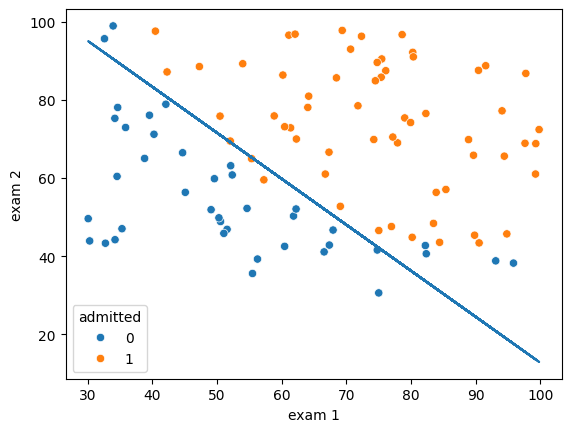

In [30]:
sbn.scatterplot(x = 'exam 1', y = 'exam 2', hue = 'admitted', data =data)
decision_boundary = -(w[0] + (w[1]/100)*data['exam 1'])/(w[2]/100)
plt.plot(data['exam 1'], decision_boundary)

In [5]:
X = np.c_[np.ones((X.shape[0], 1)), X]
#y = y[:, np.newaxis]
y = y.to_numpy()[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))